<a href="https://colab.research.google.com/github/BIDS-CPU/data-science1/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [50]:
d=pd.read_csv('iris.data.csv')

In [25]:
d.sample(5)

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
19,5.4,3.4,1.7,0.2,Iris-setosa
14,5.7,4.4,1.5,0.4,Iris-setosa
89,5.5,2.6,4.4,1.2,Iris-versicolor
7,4.4,2.9,1.4,0.2,Iris-setosa


In [5]:
d.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [28]:
d.Species.value_counts()

(Species,)     
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
dtype: int64

In [51]:
d.columns=[['SepalL','SepalW','PetalL','PetalW','Species']]

In [9]:
d.reset_index(inplace=True)

In [10]:
d

,index,SepalL,SepalW,PetalL,PetalW,Species
0,0,4.9,3.0,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.3,0.2,Iris-setosa
2,2,4.6,3.1,1.5,0.2,Iris-setosa
3,3,5.0,3.6,1.4,0.2,Iris-setosa
4,4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...,...
144,144,6.7,3.0,5.2,2.3,Iris-virginica
145,145,6.3,2.5,5.0,1.9,Iris-virginica
146,146,6.5,3.0,5.2,2.0,Iris-virginica
147,147,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
d.Species.value_counts()

(Species,)     
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
dtype: int64

In [12]:
d.isnull().sum()

index      0
SepalL     0
SepalW     0
PetalL     0
PetalW     0
Species    0
dtype: int64

In [13]:
d.describe()

,index,SepalL,SepalW,PetalL,PetalW
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,74.000000,5.848322,3.051007,3.774497,1.205369
std,43.156691,0.828594,0.433499,1.759651,0.761292
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.000000,5.100000,2.800000,1.600000,0.300000
50%,74.000000,5.800000,3.000000,4.400000,1.300000
75%,111.000000,6.400000,3.300000,5.100000,1.800000
max,148.000000,7.900000,4.400000,6.900000,2.500000


In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
Le=LabelEncoder()

In [54]:
d['Species']=Le.fit_transform(d['Species'])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
d.Species

,Species
0,0
1,0
2,0
3,0
4,0
...,...
144,0
145,0
146,0
147,0


In [21]:
d.Species.value_counts()

(Species,)
0             149
dtype: int64

In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
d['Species']=le.fit_transform(d['Species'])
d['Species'].value_counts()

(Species,)
1             50
2             50
0             49
dtype: int64

In [31]:
d.Species

,Species
0,0
1,0
2,0
3,0
4,0
...,...
144,2
145,2
146,2
147,2


In [32]:
import matplotlib.pyplot as plt

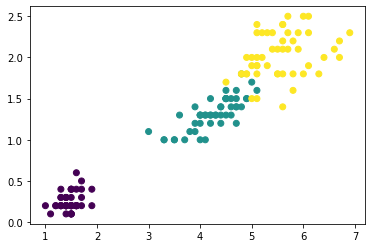

In [34]:
plt.scatter(d['PetalL'],d['PetalW'],c=d.Species.values)

In [35]:
d.corr()

,SepalL,SepalW,PetalL,PetalW,Species
SepalL,1.000000,-0.103784,0.871283,0.816971,0.781219
SepalW,-0.103784,1.000000,-0.415218,-0.350733,-0.414532
PetalL,0.871283,-0.415218,1.000000,0.962314,0.948519
PetalW,0.816971,-0.350733,0.962314,1.000000,0.956014
Species,0.781219,-0.414532,0.948519,0.956014,1.000000


In [37]:
d.columns


MultiIndex([( 'SepalL',),
            ( 'SepalW',),
            ( 'PetalL',),
            ( 'PetalW',),
            ('Species',)],
           )

In [81]:
d=d.iloc[:,[0,1,2,3]].values
d

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3

In [82]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(d)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
wcss

[673.4632214765102,
 152.30491475019824,
 78.91880877308478,
 57.295840561224495,
 46.513549398220825,
 38.85631917502786,
 34.32210714285715,
 30.134513429845015,
 27.890216450216457,
 26.466401070198557]

Text(0.5, 1.0, 'Elbow Method to Find Optimal Number of clusters')

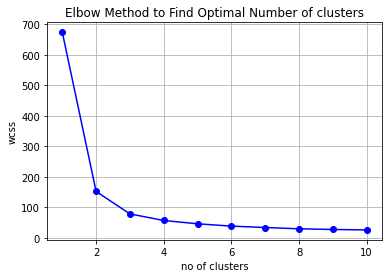

In [83]:
plt.plot(range(1, 11), wcss,marker='o',color='blue')
plt.grid()
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.title('Elbow Method to Find Optimal Number of clusters')

In [84]:
km=KMeans(n_clusters=3,init = 'k-means++', random_state = 5)

In [87]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [85]:
y_kmeans=km.fit_predict(d)

In [67]:
Up

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

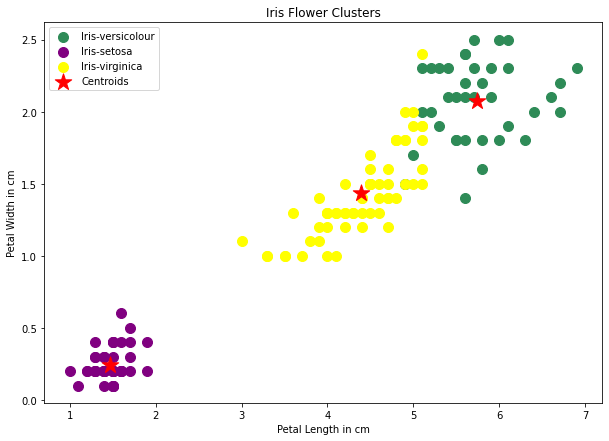

In [88]:
fig = plt.figure(figsize=(10, 7))
plt.title('Clusters with Centroids',fontweight ='bold', fontsize=20)
plt.scatter(d[y_kmeans == 0, 2], d[y_kmeans == 0, 3], s = 100, c = 'seagreen', label = 'Iris-versicolour')
plt.scatter(d[y_kmeans == 1, 2], d[y_kmeans == 1, 3], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(d[y_kmeans == 2, 2], d[y_kmeans == 2, 3],s = 100, c = 'yellow', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 300, c = 'red',marker='*', 
            label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()